# **Excavate**

In this notebook, we used various deep learning models to predict the Glass Forming Ability (GFA) which is measured by material's critical
 casting diameter (Dmax).

In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.simplefilter("ignore")

In [ ]:
# Reading the dataset
df = pd.read_excel('/content/DATA.xlsx')

## Data Visualisation

In [ ]:
# Displaying the data
df.head()

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3


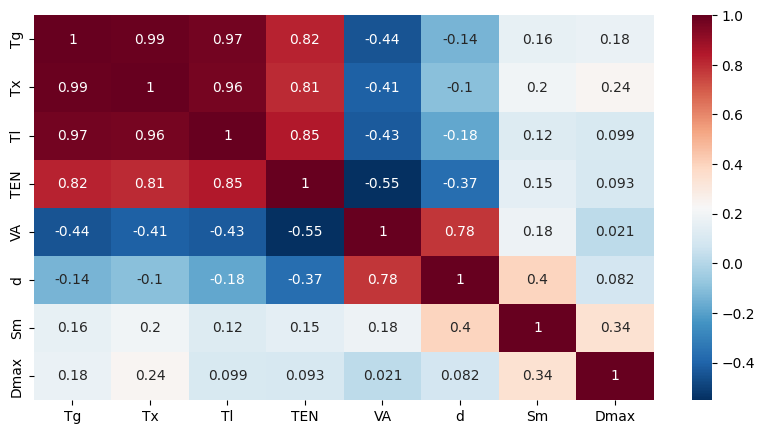

In [ ]:
# Printing the correlation matrix of the dataset
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu_r')
plt.show()

Iit was observed upon visualization, that the given features did not show good correlation with Dmax.

Therefore, new features were formed based on orginal features after going through some research papers, as these formulas show significant correlation with Dmax.

T_1 = Tg^2 / Tl^3

T_2 = (Tg+Tx)^2 * (Tl-Tg')^-3

T_3 = Tg^2/(39(Tl)(14Tl - (Tx-Tg)**2))

T_4 = Tg/(Tx - (2*Tg/(Tg+Tl)))

T_5 = Tx/(Tg+Tl)

https://www.sciencedirect.com/science/article/abs/pii/S0927025621002196

E = TEN - (4(2)^0.5(VA))

https://pubs.rsc.org/en/content/articlehtml/2021/sc/d0sc06675c

In [ ]:
# new column features by applying various feature combinations
df.insert(4,'T_1',df['Tg']**2/df['Tl']**3)
df.insert(5, 'T_2', ((df['Tg']+df['Tx'])**2)*((df['Tl']-df['Tg'])**(-3)))
df.insert(6,'T_3',((df['Tg'])**2)/(39*df['Tl']*(14*df['Tl'] - (df['Tx']-df['Tg'])**2)))
df.insert(7,'T_4',(df['Tg']/df['Tx']) - ((2*df['Tg'])/(df['Tg']+df['Tl'])))
df.insert(8,'T_5', df['Tx']/(df['Tg']+df['Tl']))
df.insert(9, 'E', df['TEN'] - (4*(2)**0.5*df['VA']))

An R2 score of 0.66 was achieved even after applying many formulas.

Subsequently, research papers were reviewed, and an intuition was obtained regarding the previously disregarded ID's potential significance. Upon extracting data i.e. metallic composition from the Alloy, an improvement in the model's R2 score was observed.

In [ ]:
# A list of all 118 elements of a periodic table is created
element = ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu',
           'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce',
           'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn','Fr', 'Ra',
           'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'
]

df_metal = pd.DataFrame(0, index = range(0,441),columns = element)

# Extracting the elemental composition of each alloy and appending to the dataframe created.
for index, alloy in enumerate(df['Alloy']):
  number = False
  Ind = str
  Ele = ""
  Num = ""
  for char in alloy:
    if not (number):
      if ((not char.isnumeric())):
        Ele += char
      else:
        number = True
        Num += char
    else:
      if (char.isnumeric() or char=="."):
        Num += char
      else:
        number = False
        df_metal.loc[index, Ele] = float(Num)
        Ele = ""
        Num = ""
        Ele += char
  df_metal.loc[index, Ele] = float(Num)

df_metal.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og,(CuNi)
0,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


Upon observation, modifications were made to three elements' composition, Al, Ti, and Ag, in such a way that their presence and absence create a hyperplane, ultimately contributing to the improved accuracy of the model.

In [ ]:
df_metal = df_metal[[metal for metal in df_metal.columns if np.count_nonzero(df_metal[metal])>20]]
df_metal['Dmax'] = df['Dmax']

df_metal.loc[df_metal['Dmax'] < 5, 'Al'] = 0
df_metal.loc[(df_metal['Al'] == 0) & (df_metal['Dmax'] >= 5), 'Al'] = 1

df_metal.loc[df_metal['Dmax'] > 6, 'Ti'] = 0
df_metal.loc[(df_metal['Ti'] == 0) & (df_metal['Dmax'] <= 6), 'Ti'] = 1

#df_metal.loc[df_metal['Dmax'] < 6, 'Ag'] = 0
df_metal.loc[(df_metal['Ag'] == 0) & (df_metal['Dmax'] >= 6), 'Ag'] = 1

In [ ]:
# Dropping the alloy column
df.drop("Alloy", axis = 1,inplace=True)

# Inserting the elements composition
df.insert(12,'Al_comp',df_metal['Al'])
df.insert(13,'Ti_comp',df_metal['Ti'])
df.insert(14, 'Cu_comp', df_metal['Cu'])
df.insert(15, 'Ag_Comp', df_metal['Ag'])

In [ ]:
df.head()

,Tg,Tx,Tl,T_1,T_2,T_3,T_4,T_5,E,TEN,VA,d,Al_comp,Ti_comp,Cu_comp,Ag_Comp,Sm,Dmax
0,670.0,708.0,1226.0,0.000244,0.011048,0.000597,0.239577,0.373418,-73.306456,1.76,13.27,0.10,0.0,50.0,42.5,0.0,7.90,0.2
1,630.0,689.0,1200.0,0.000230,0.009394,0.000637,0.225844,0.376503,-102.492981,1.48,18.38,0.13,0.0,1.0,19.0,0.0,7.92,0.2
2,640.0,710.0,1220.0,0.000226,0.009341,0.000707,0.213236,0.381720,-100.965630,1.48,18.11,0.15,0.0,1.0,3.0,0.0,8.05,0.2
3,407.0,439.0,809.0,0.000313,0.011017,0.000510,0.257699,0.361020,-91.744958,1.48,16.48,0.10,0.0,1.0,0.0,46.2,8.79,0.3
4,428.0,488.0,843.0,0.000306,0.011739,0.000679,0.203564,0.383950,-86.374084,1.59,15.55,0.10,0.0,1.0,7.7,53.8,9.45,0.3


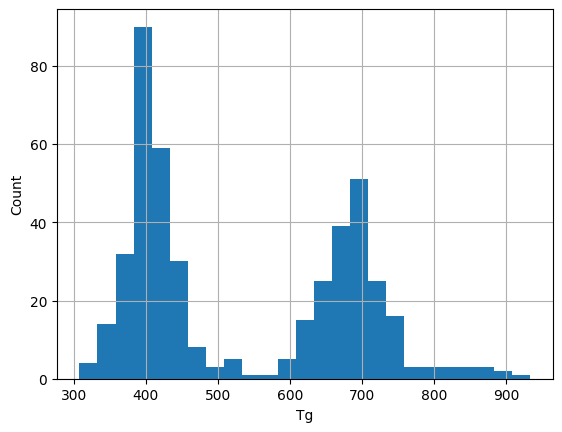

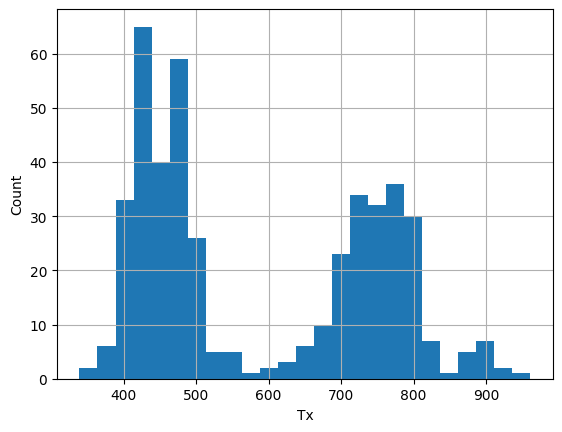

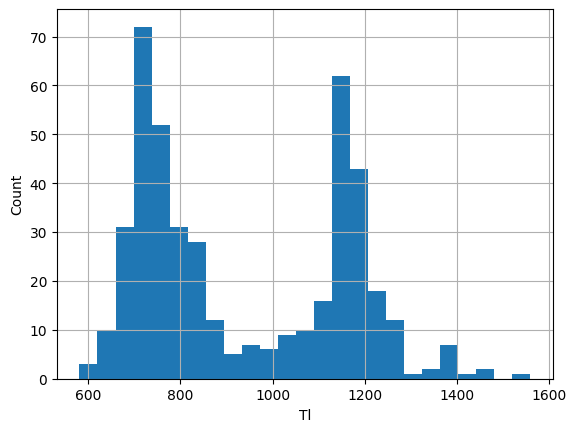

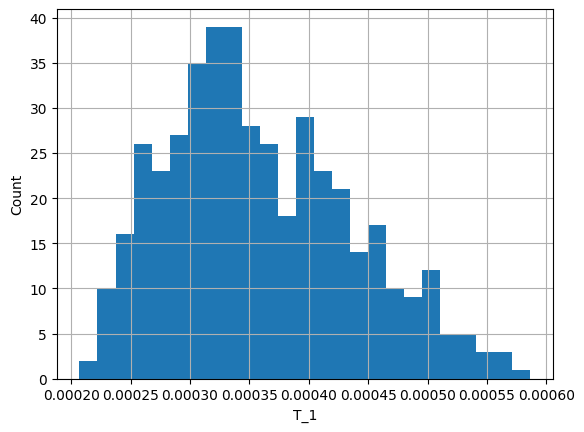

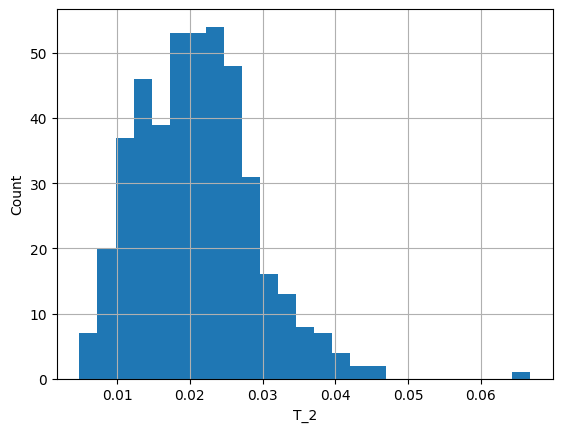

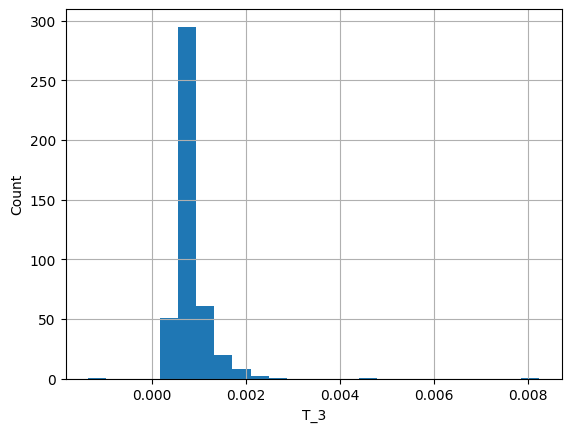

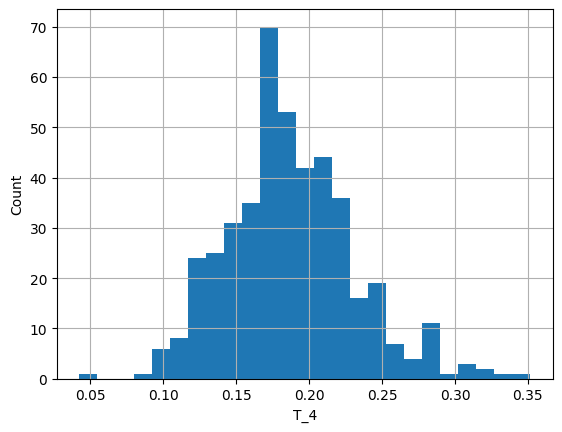

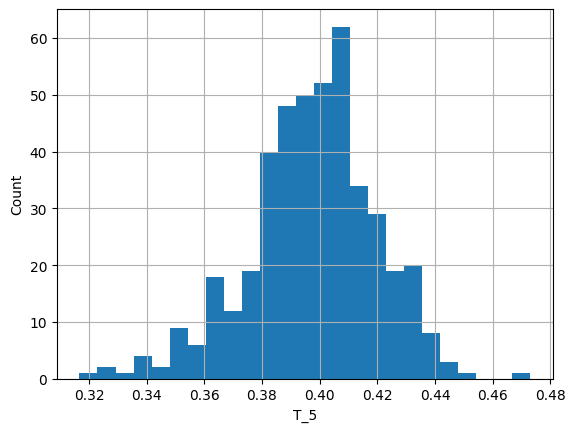

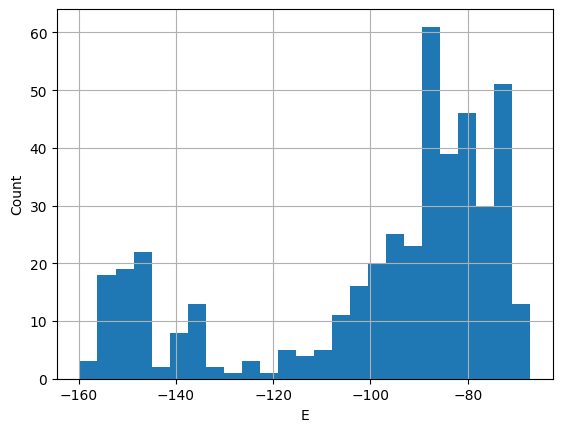

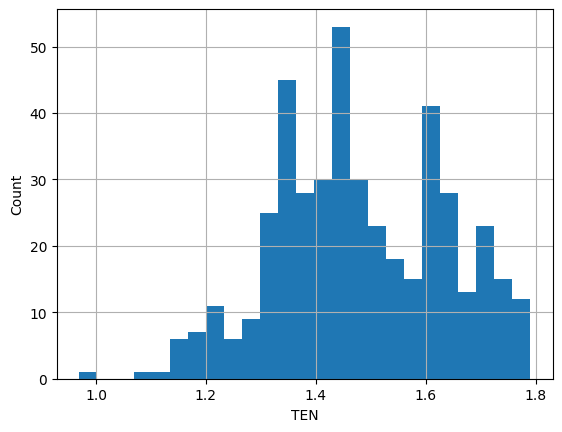

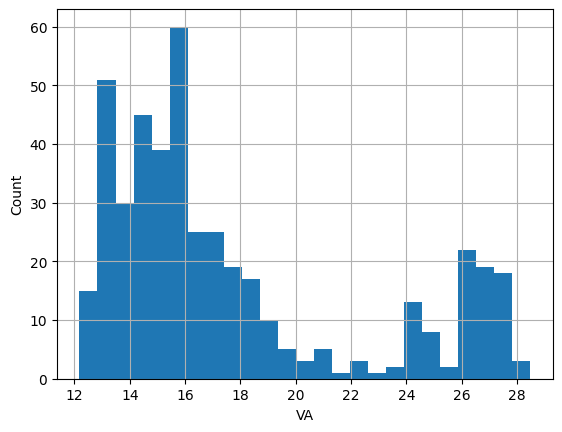

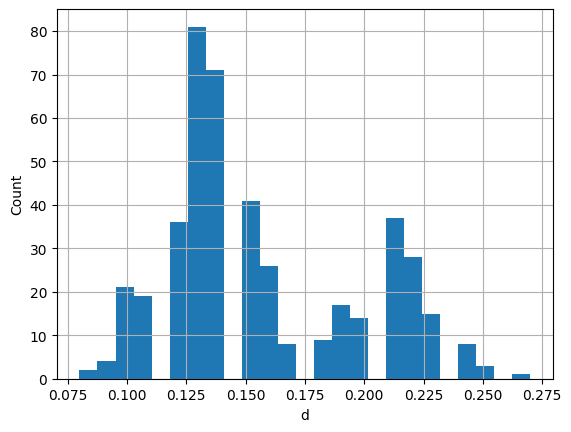

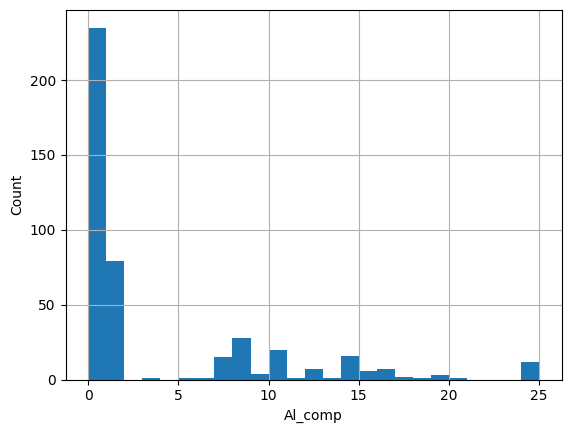

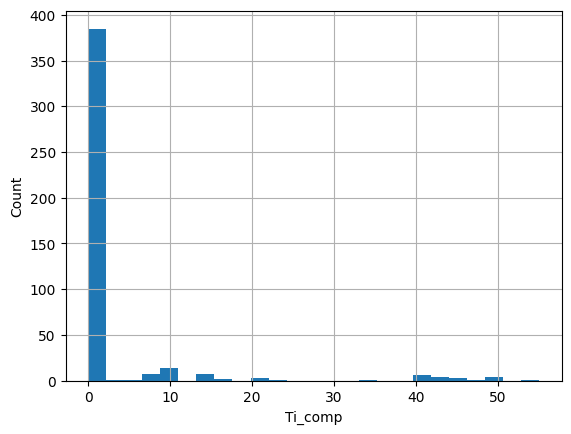

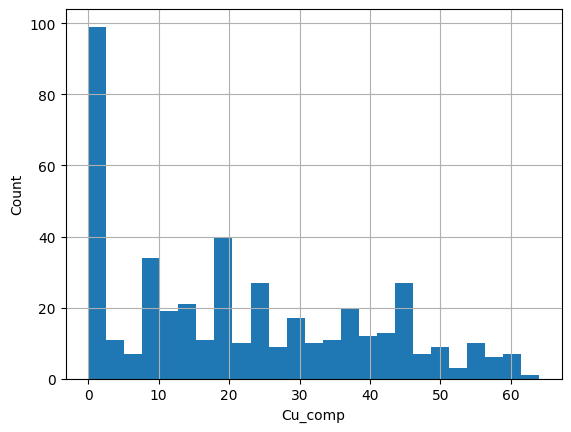

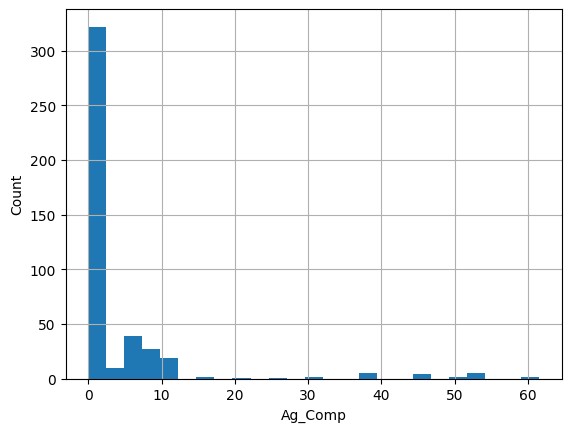

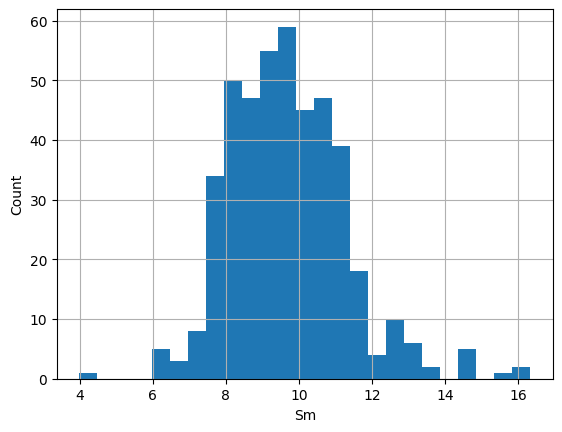

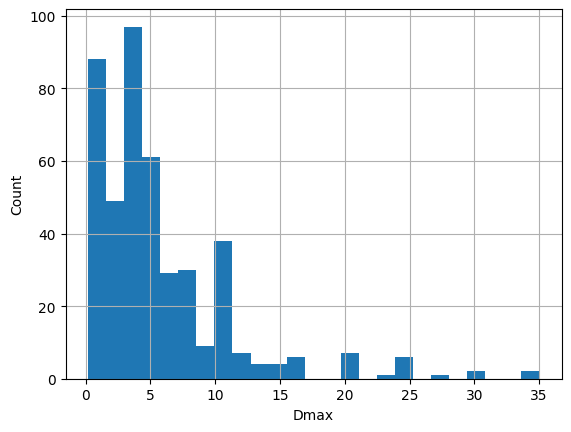

In [ ]:
# Visualizing the data count distribution
continuous_features  = df.columns
for feature in continuous_features:
    data = df.copy()
    data[feature].hist(bins = 25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

## Data Preprocessing

Quantile transformation is a statistical technique used to transform a variable so that its probability distribution matches that of a chosen reference distribution, typically a uniform or normal distribution.

It scales down every feature to (0,1)

In [ ]:
# Applying quantile transformation on the features
from sklearn.preprocessing import QuantileTransformer

df_quantile = df.iloc[:441,0:-1]
qt = QuantileTransformer(n_quantiles=100)
df_quantile = pd.DataFrame(qt.fit_transform(df_quantile), columns=df_quantile.columns)

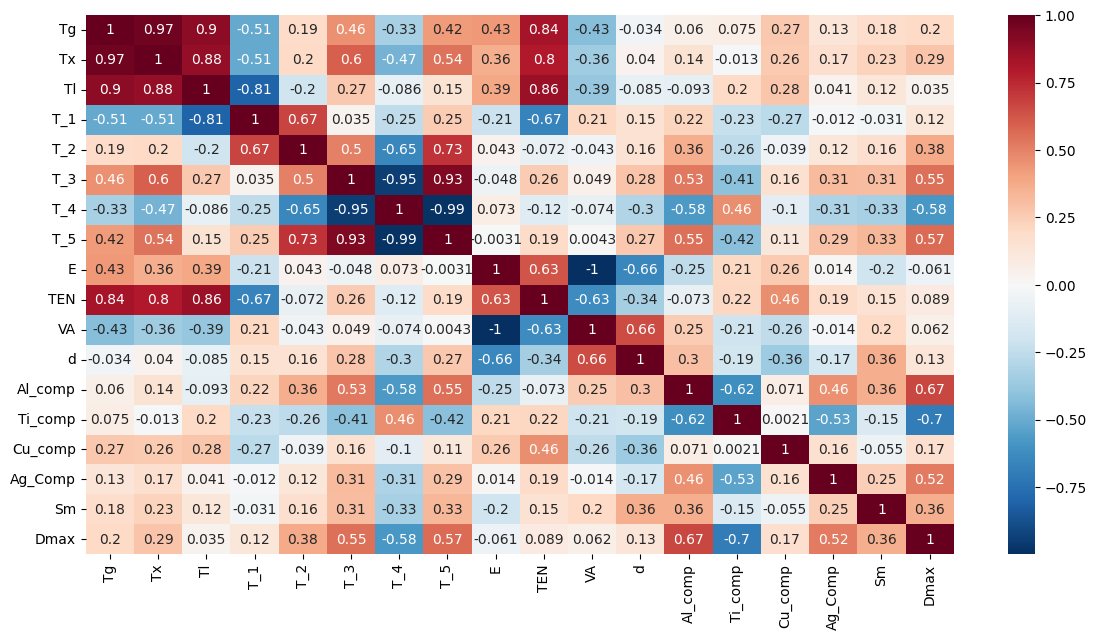

In [ ]:
# Getting the correlation matrix of the dataset
df_quantile['Dmax'] = df['Dmax']
plt.figure(figsize = (14,7))
sns.heatmap(df_quantile.corr(), annot = True, cmap = 'RdBu_r')
plt.show()

## Feature Selection

In [ ]:
df_X = df_quantile.iloc[:441,:-1]
df_y = df.iloc[:441,-1]

In [ ]:
print('df_X')
print(df_X.head())
print('df_y')
print(df_y.head())

df_X
         Tg        Tx        Tl       T_1       T_2       T_3       T_4  \
0  0.707071  0.636364  0.924928  0.034239  0.098531  0.146508  0.888601   
1  0.595347  0.598679  0.888636  0.019148  0.048824  0.215126  0.847849   
2  0.614506  0.643357  0.918054  0.010098  0.047070  0.384464  0.756863   
3  0.313131  0.242424  0.441474  0.313314  0.096301  0.062615  0.937984   
4  0.429293  0.463287  0.504611  0.265178  0.122616  0.313541  0.673844   

        T_5         E       TEN        VA         d  Al_comp   Ti_comp  \
0  0.124518  0.896811  0.979798  0.111714  0.035354      0.0  0.991736   
1  0.144022  0.278458  0.550505  0.723178  0.277778      0.0  0.575758   
2  0.194003  0.296307  0.550505  0.705711  0.575758      0.0  0.575758   
3  0.059751  0.420409  0.550505  0.579078  0.035354      0.0  0.575758   
4  0.228762  0.572896  0.696970  0.425652  0.035354      0.0  0.575758   

    Cu_comp   Ag_Comp        Sm  
0  0.823232  0.000000  0.107871  
1  0.464646  0.000000  0.111384

In [ ]:
# Seed for reproducibility
import numpy as np
np.random.seed(10)

In [ ]:
# Splitting the dataset into training and testing cases
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 42)

## Model Selection

As it is a regression task, different regression models such as Gradient Boosting, Random Forest, Extra Gradient Boosting, Extra Tree etc. are implemented and their emsemble model as well. To test the accuracy, r2_score is used.

### R2 score

The R2 score or coefficient of determination indicates the proportion of the variance in the dependent variable explained by the independent variable in the regression model. It ranges from 0 to 1, where 1 indicates perfect fit, 0 indicates perfect fit that there is no improvement over the constant model, and negative coefficients indicate that the model performs worse than the constant.

R2 = 1 - (SSR/SST) = 1 - (∑(yi-y_pred)^2/∑(yi-y_mean)^2)

where

SSR: sum of the residuals

SST: total sum of squares

yi: original y value

y_pred: predicted y value

y_mean: mean y value

### XGBoost

XGBoost works by iterating simple decision trees, where each tree corrects the error of the previous one. It enables normal objective functions that combine loss functions with regular steps, using gradient enhancement techniques to reduce objective functions. Furthermore, XGBoost offers advanced features such as parallel and distributed computing, tree pruning, and hardware optimization serves to increase training speed and model performance

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

xgbmodel = XGBRegressor()

kfold = KFold(n_splits=10, shuffle=True)
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Create the ExtraTreesRegressor model

# Train the model
  xgbmodel.fit(X_train, y_train)

# Make predictions
  y_pred = xgbmodel.predict(X_test)
  acc_per_fold.append(r2_score(y_test,y_pred))
  fold_no = fold_no + 1

print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.8444288403647098
Standard Deviation of R2 Score: 0.0


### Extra Tress Regressor

Extra Trees Regressor is a cluster learning method that generates multiple decision trees from randomly selected training data. It combines their predictions by averaging to reduce overfitting and improve generalization performance, as well as leverage randomness of feature selection and node splitting for increased robustness against noisy data

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

model = ExtraTreesRegressor()


kfold = KFold(n_splits=10, shuffle=True)
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Create the ExtraTreesRegressor model
  model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
  model.fit(X_train, y_train)

# Make predictions
  y_pred = model.predict(X_test)
  acc_per_fold.append(r2_score(y_test,y_pred))
  fold_no = fold_no + 1

#print(np.mean(acc_per_fold))
print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.8669322562606059
Standard Deviation of R2 Score: 0.0


### Multi-Layer Perceptron Regressor

The MLP Regressor, short for Multi-layer Perceptron Regressor, is a type of artificial neural network that learns to map input features to continuous target values. It consists of multiple layers of interconnected neurons, where each neuron computes a weighted sum of its inputs, applies an activation function, and passes the result to the next layer. Through backpropagation and gradient descent, the MLP adjusts its internal parameters to minimize the difference between predicted and actual target values during training.

In [ ]:
# prompt: create a mlp model with k fold validation and calculate the R2 score
from sklearn.neural_network import MLPRegressor
# Define the base models
model = MLPRegressor(hidden_layer_sizes=(200,200,200), solver='adam', activation='relu', max_iter=1000)

kfold = KFold(n_splits=10, shuffle=True)
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Create the ExtraTreesRegressor model

# Train the model
  model.fit(X_train, y_train)

# Make predictions
  y_pred = model.predict(X_test)
  acc_per_fold.append(r2_score(y_test,y_pred))
  fold_no = fold_no + 1

print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.858134903007722
Standard Deviation of R2 Score: 0.00537963315686595


### Random Forest

Random Forest is an ensemble learning technique that constructs multiple decision trees during training. It aggregates their predictions through averaging or voting, mitigating overfitting and increasing predictive accuracy. Additionally, it introduces randomness in the feature selection process and bootstrapping samples to enhance model diversity and robustness.

In [ ]:
# prompt: create random forest with  K fold vaidation model on the dataset
from sklearn.ensemble import RandomForestRegressor
# Create the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Create the KFold object
kfold = KFold(n_splits=10, shuffle=True)

# Initialize lists for storing the accuracy scores
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

    # Train the model
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate the accuracy score
    acc_per_fold.append(r2_score(y_test, y_pred))
    fold_no = fold_no + 1

# Print the average accuracy score
print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.7877307268610367
Standard Deviation of R2 Score: 1.1102230246251565e-16


### Gradient Boosting

Gradient Boosting is an ensemble learning technique that sequentially builds a series of weak learners, typically decision trees, to correct the errors of previous models. It optimizes a loss function by fitting each subsequent model to the negative gradient of the loss function with respect to the predictions of the ensemble. Through this iterative process, Gradient Boosting gradually improves predictive accuracy by focusing on the residuals of the previous models.

In [ ]:
# prompt: create Gradient Boosting Regression with  K fold vaidation model on the dataset

from sklearn.ensemble import GradientBoostingRegressor

# Create the GradientBoostingRegressor model
gbr = GradientBoostingRegressor()

# Create the KFold object
kfold = KFold(n_splits=10, shuffle=True)

# Initialize lists for storing the accuracy scores
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

    # Train the model
    gbr.fit(X_train, y_train)

    # Make predictions
    y_pred = gbr.predict(X_test)

    # Calculate the accuracy score
    acc_per_fold.append(r2_score(y_test, y_pred))
    fold_no = fold_no + 1

# Print the average accuracy score
print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.7984139887653252
Standard Deviation of R2 Score: 0.004145269859544727


### Stacking Ensemble

Stacking Ensemble is a meta-ensemble technique where multiple diverse base models are trained to make predictions on the dataset. A meta-learner then combines these predictions to generate a final output, effectively leveraging the strengths of each base model to improve overall predictive performance.

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

# Define the base models
estimators = [
    ('xgb', XGBRegressor()),
    ('mlp', MLPRegressor(hidden_layer_sizes=(200,200,200), solver='adam', activation='relu', max_iter=1000)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42))
]
# Create the stacking ensemble model
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=ExtraTreesRegressor(n_estimators=100, random_state=42)
)

kfold = KFold(n_splits=10, shuffle=True)
acc_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(df_X, df_y):

# Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

# Create the ExtraTreesRegressor model

# Train the model
  stacking_model.fit(X_train, y_train)

# Make predictions
  y_pred = stacking_model.predict(X_test)
  acc_per_fold.append(r2_score(y_test,y_pred))
  fold_no = fold_no + 1

print('Average of R2 Score:',np.mean(acc_per_fold))
print('Standard Deviation of R2 Score:',np.std(acc_per_fold))

Average of R2 Score: 0.8140747638633904
Standard Deviation of R2 Score: 0.019319588248778587
